In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from statsmodels.graphics.mosaicplot import mosaic

Gender	Categorical: The gender of the individual.

Age	Feature	Continuous: The age of the individual.

Height	Feature	Continuous: The height of the individual in meters.

Weight	Feature	Continuous: The weight of the individual in kilograms.

family_history_with_overweight	Feature	Binary: Indicates whether the individual has a family member who suffers from overweight.

FAVC	Feature	Binary: Indicates whether the individual frequently consumes high caloric food.

FCVC	Feature	Integer: Indicates the frequency of vegetable consumption in the individual's meals.

NCP	Feature	Continuous: Indicates the number of main meals the individual has daily.

CAEC	Feature	Categorical: Indicates whether the individual eats any food between meals.

SMOKE	Feature	Binary: Indicates whether the individual smokes.

CH2O	Feature	Continuous: Indicates the amount of water the individual drinks daily in liters.

SCC	Feature	Binary: Indicates whether the individual monitors the calories they eat daily.

FAF	Feature	Continuous: Indicates how often the individual engages in physical activity per week.

TUE	Feature	Integer: Indicates the amount of time the individual uses technological devices daily in hours.

CALC	Feature	Categorical: Indicates how often the individual drinks alcohol.

MTRANS	Feature	Categorical: Indicates the transportation mode usually used by the individual.

NObeyesdad	Target	Categorical: Represents the obesity level of the
individual

https://www.kaggle.com/code/arvindkhoda/obesity-levels-analysis/inpu

In [58]:
test=pd.read_csv('/content/test_set.csv')
df=pd.read_csv('/content/obesity_data.csv')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


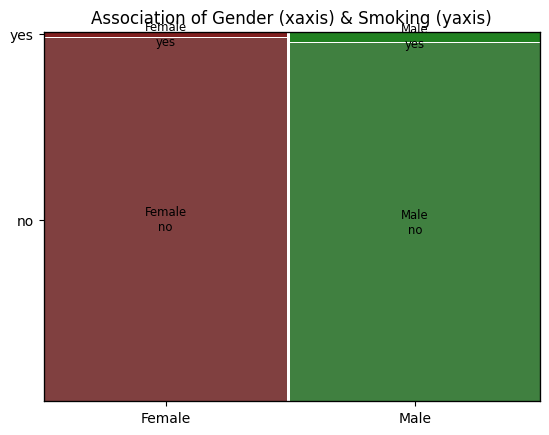

,FAF
count,2111.000000
mean,1.010298
std,0.850592
min,0.000000
25%,0.124505
50%,1.000000
75%,1.666678
max,3.000000


In [88]:
print("Dimensions:",df.shape)

fig, ax=plt.subplots()
ax.pie(df['NObeyesdad'].value_counts(),labels=df['NObeyesdad'].unique())
plt.title("Obesity Levels")

plt.figure(figsize=(6,6))
plt.bar(df['MTRANS'].unique(),df['MTRANS'].value_counts())
plt.title("Transportation Types")
plt.xticks(rotation=45)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Weight'],y=df['Height'],hue=df['NObeyesdad'])
plt.ylabel("Height (m)")
plt.xlabel("Weight (kg)")
plt.title("Height v. Weight by Obesity Category")
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x='Age',hue='NObeyesdad')
plt.title("Age Distribution by Obesity Category")

fig, axs=plt.subplots(1,3)
axs[0].boxplot(df['Weight'])
axs[0].set_title("Weight (kg)")
axs[1].boxplot(df['Height'])
axs[1].set_title("Height (m)")
axs[2].boxplot(df['Age'])
axs[2].set_title("Age")
fig.subplots_adjust(right=0.98, hspace=0.4, wspace=0.3)

mosaic(df,['Gender','SMOKE'],title='Association of Gender (xaxis) & Smoking (yaxis)')
plt.show()

This dataset has over 2000 entries with 11 variable columns, including the response variable.
There appears to be a pretty even split between all types of response variables, which is the obesity levels. On the other hand, the bar chart for transportation displays an overwhelming majority of public transportation compared to all other types.
The correlation between height and weight seems high, so will check for multicollinearity. Additionally, the age distribution for each obesity level has one peak except for obesity type 2 and 3. There's also very little overlap between obesity levels per weight and height combinations. The categories are very distinct.
All distributions for age also appear to peak around the same age range. However, the boxplot is displaying many outlier points despite the low mean.
There's an overwhelmingly low number of smokers in this dataset, but there is a pretty even split between men and women.

In [6]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df[['CALC','CAEC']]=df[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
df[['FAVC','SCC','SMOKE','family_history_with_overweight']]=df[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})

/tmp/ipython-input-2119588810.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['CALC','CAEC']]=df[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
/tmp/ipython-input-2119588810.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['FAVC','SCC','SMOKE','family_history_with_overweight']]=df[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})


In [7]:
x=df[['Gender','CALC','CAEC','FAVC','SCC','SMOKE','family_history_with_overweight','Height','Weight','Age','FCVC','NCP','CH2O','FAF','TUE']]
vif_df=pd.DataFrame()
vif_df['Feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print("Mean VIF: ",vif_df['VIF'].mean())
vif_df

Mean VIF:  14.879775648838335


,Feature,VIF
0,Gender,2.436498
1,CALC,3.349841
2,CAEC,8.167680
3,FAVC,9.985408
4,SCC,1.151017
5,SMOKE,1.054464
6,family_history_with_overweight,7.887277
7,Height,90.390356
8,Weight,22.307421
9,Age,17.751679


In regression, VIF is the ratio of variance in a parameter compaerd to other parameters. It's best at analyzing multicollinearity. Generally, there are many cutoff thresholds like 3 or 5, in which any VIF higher than those should be removed for high multicollinearity, but for this dataset, a threshold of VIF>10 will be used. Among the features selected, CH20, height, weight and age all have high VIF, so CH20, height and weight will be removed. However, VIF won't need to be considered for Neural Network and Random Forest

In [8]:
x2=df[['Gender','Age','FAVC','SCC','SMOKE','family_history_with_overweight','FAF','TUE']]
vif_df=pd.DataFrame()
vif_df['Feature']=x2.columns
vif_df['VIF']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
print("Mean VIF: ",vif_df['VIF'].mean())
vif_df

Mean VIF:  3.913802375085234


,Feature,VIF
0,Gender,1.923814
1,Age,9.227767
2,FAVC,7.696621
3,SCC,1.096289
4,SMOKE,1.040274
5,family_history_with_overweight,5.953788
6,FAF,2.236222
7,TUE,2.135645


This model will be a random forest attempting to predict a person's obesity level

In [9]:
train=pd.read_csv('/content/train_set.csv')
x_train=train.iloc[:,:-1]
y_train=train['NObeyesdad']
x_test=test.iloc[:,:-1]
y_test=test['NObeyesdad']

In [10]:
x_train['Gender']=x_train['Gender'].map({'Male':0,'Female':1})
x_train[['CALC','CAEC']]=x_train[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
le=LabelEncoder()
x_train['MTRANS']=le.fit_transform(x_train['MTRANS'])

x_test['Gender']=x_test['Gender'].map({'Male':0,'Female':1})
x_test[['CALC','CAEC']]=x_test[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_test[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_test[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
x_test['MTRANS']=le.fit_transform(x_test['MTRANS'])

/tmp/ipython-input-2960947502.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[['CALC','CAEC']]=x_train[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
/tmp/ipython-input-2960947502.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
/tmp/ipython-input-2960947502.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

In [11]:
x_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.000000,1,1.630000,60.000000,1,1,3.000000,3.000000,0,1,2.000000,1,2.000000,0.000000,3,3
1,20.924956,1,1.752531,133.618706,1,1,3.000000,3.000000,0,0,2.887659,1,1.480919,0.779641,1,3
2,22.899740,1,1.661715,82.595793,1,1,1.203754,1.355354,0,0,2.765593,1,0.128342,1.659476,1,3
3,21.837996,1,1.588046,44.236067,0,0,3.000000,1.696080,0,0,2.550307,0,1.098862,0.000000,2,3
4,25.994746,0,1.811602,106.042142,1,1,3.000000,3.000000,0,0,2.858171,1,1.813318,0.680215,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,32.290160,0,1.754956,120.098812,1,1,2.967300,3.000000,0,0,2.530035,1,0.955317,1.339232,1,0
1684,23.000000,0,1.718981,81.669950,1,1,2.000000,1.729553,0,0,1.400247,1,0.887923,1.011983,1,3
1685,22.989846,1,1.650000,80.000000,0,1,2.000000,3.000000,0,0,2.000000,1,0.146919,2.000000,1,3
1686,23.000000,1,1.628168,84.497980,0,1,2.058687,2.962004,0,0,2.010596,1,0.851059,0.630866,1,3


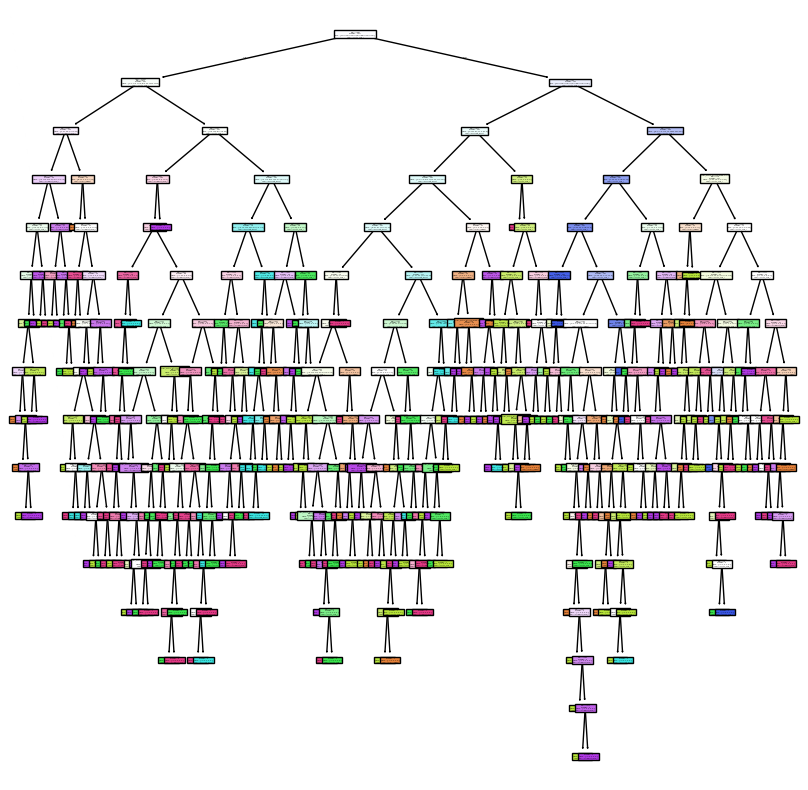

Random Forest Score: 0.9479905437352246


In [12]:
rf=RandomForestClassifier(n_estimators=50,random_state=123)
rf.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(rf.estimators_[0],feature_names=x_train.columns.tolist(),class_names=y_train.unique().tolist(),filled=True)
plt.show()
print("Random Forest Score:",rf.score(x_test,y_test))

In [17]:
gb=GradientBoostingClassifier(random_state=123)
param={'n_estimators':range(40,110,20),'learning_rate':[0.01,0.1,0.05],'max_depth':range(5,11)}
grid_search=GridSearchCV(estimator=gb,param_grid=param,scoring='accuracy',cv=5)
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_
best_score=grid_search.best_score_
best_model=grid_search.best_estimator_

print(best_params,best_model,best_model.score(x_test,y_test))

KeyboardInterrupt: 